In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=1., 
        rc={'figure.figsize':(8,5)})


## Read data

In [2]:
train_070 = pd.read_csv(os.path.join("..", "database_split", "train_0-70.csv"))
val_070 = pd.read_csv(os.path.join("..", "database_split", "val_0-70.csv"))
test_070 = pd.read_csv(os.path.join("..", "database_split", "test_0-70.csv"))

train_70100 = pd.read_csv(os.path.join("..", "database_split", "train_70-100.csv"))
val_70100 = pd.read_csv(os.path.join("..", "database_split", "val_70-100.csv"))
test_70100 = pd.read_csv(os.path.join("..", "database_split", "test_70-100.csv"))

In [3]:
# Unique train images
unique_070 = train_070.drop_duplicates('Subject ID')
print("0-70 - ", len(unique_070), "unique subjects")
unique_70100 = train_70100.drop_duplicates('Subject ID')
print("70-100 - ", len(unique_70100), "unique subjects")


0-70 -  596 unique subjects
70-100 -  224 unique subjects


In [4]:
train_070['unique'] = 'Longitudinal'
train_070.loc[unique_070.index, 'unique'] = 'Regular'
train_070['split'] = "0-70 years"

train_70100['unique'] = 'Longitudinal'
train_70100.loc[unique_70100.index, 'unique'] = 'Regular'
train_70100['split'] = "70-100 years"
train = pd.concat([train_070, train_70100]).reset_index(drop=True)

train['database'] = train['Image Filename'].apply(lambda x: "ADNI" if 'ADNI' in x else 'IXI')

In [5]:
train.head()

,Subject ID,Age,Research Group,Image Filename,unique,split,database
0,037_S_4028,63.8,CN,037_S_4028_ADNI2_Month_3_MRI-New_Pt,Regular,0-70 years,ADNI
1,012_S_4643,65.7,CN,012_S_4643_ADNI2_Month_6-New_Pt,Regular,0-70 years,ADNI
2,073_S_4795,62.8,CN,073_S_4795_ADNI2_Year_1_Visit,Regular,0-70 years,ADNI
3,012_S_4643,65.4,CN,012_S_4643_ADNI2_Month_3_MRI-New_Pt,Longitudinal,0-70 years,ADNI
4,099_S_0534,65.0,CN,099_S_0534_ADNI1GO_Month_24,Regular,0-70 years,ADNI


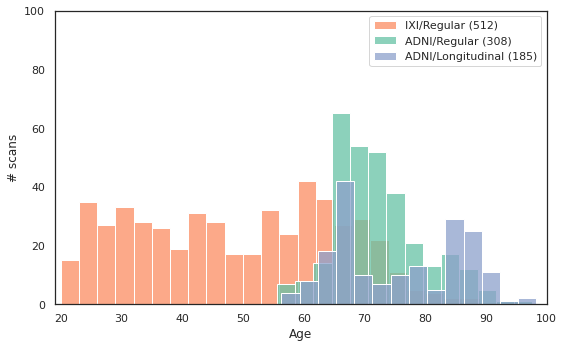

In [6]:
# W/ Data Augmentation
cmap = sns.color_palette('Set2')

fig = plt.figure()

ax1 = sns.histplot(data=train[(train.unique == 'Regular') &
                               (train.database == 'IXI')], x="Age",
                   label='IXI/Regular (512)', binwidth=3, color=cmap[1])
ax2 = sns.histplot(data=train[(train.unique == 'Regular') &
                               (train.database == 'ADNI')], x="Age",
                   label='ADNI/Regular (308)', binwidth=3, color=cmap[0])
ax3 = sns.histplot(data=train[train.unique == 'Longitudinal'], x="Age",
                   label='ADNI/Longitudinal (185)', binwidth=3, color=cmap[2])
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.xlim(19, 100)
plt.ylim(0, 100)
plt.legend()
ax3.set(ylabel='# scans', xlabel='Age')
fig.tight_layout()
fig.savefig('Histogram_data_distribution.pdf', bbox_inches='tight', dpi=300)

In [7]:
# We applied four DataAugmentations
_train = train.copy()
_train['DataAug'] = 'None'
train_aug = _train.copy()
for transf in ['bf', 'noise', 'trans', 'rot']:
    _train['DataAug'] = transf
    train_aug = pd.concat([train_aug, _train])
train_aug.DataAug.value_counts()

rot      1005
bf       1005
trans    1005
noise    1005
None     1005
Name: DataAug, dtype: int64

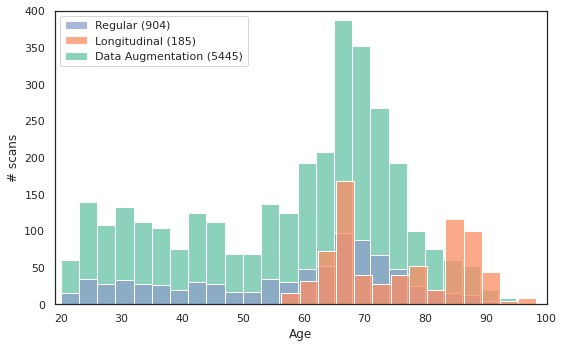

In [8]:
# W/ Data Augmentation
cmap = sns.color_palette('Set2')

fig = plt.figure()

ax1 = sns.histplot(data=train_aug[(train_aug.unique == 'Regular') &
                                  (train_aug.DataAug != 'None')], x="Age",
                   label='Data Augmentation (5445)', binwidth=3, color=cmap[0])

ax3 = sns.histplot(data=train_aug[(train_aug.unique == 'Regular') &
                                  (train_aug.DataAug == 'None')], x="Age",
                   label='Regular (904)', binwidth=3, color=cmap[2])
                   
ax2 = sns.histplot(data=train_aug[(train_aug.unique == 'Longitudinal') &
                                  (train_aug.DataAug != 'None')], x="Age",
                   label='Longitudinal (185)', binwidth=3, color=cmap[1])



handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.xlim(19, 100)
plt.ylim(0, 400)
# plt.legend()
ax3.set(ylabel='# scans', xlabel='Age')
fig.tight_layout()
fig.savefig('Histogram_data_augmentation_distribution.pdf', bbox_inches='tight', dpi=300)